I want to predict if an NBA team will make the playoffs. I chose this for my first Machine Learning project because I already know which variables increase the chances of making the playoffs. I am also initerested in the power of the variables when creating the models.

In [1]:
import matplotlib.pyplot as plt  # To visualize
import matplotlib
matplotlib.use("Qt5Agg")
import pandas as pd
import numpy as np
import os
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import export_graphviz
from sklearn import tree
import numpy as np
from sklearn import metrics
pd.options.mode.chained_assignment = None  # default='warn'

First, I am going to initialize some lists and variables that I will use for iteration purposes or throughout the program

In [2]:
# Variables I'll need throughout
path = "/Users/matthewmacrides/Python/Machine Learning/Playoff"

sep = r'/'

seasons = ['18-19', '21-22']

models = ['Decision Tree', 'Random Forest']

stats = ['PS','Wins','PA','PD','FG%', '3P%', 'FT%', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF']

I decided to make a for-loop in the case that I add more years of data in the future. All I will need to do is save the .csv file and update the seasons list.

In [3]:
def readData():
     # Create dataframes that will store all the years data
     Nba = pd.DataFrame()

     for season in seasons:
          Nba_ = pd.read_csv(path+sep+season+'.csv', sep=',', decimal='.')
          
          # Create a season column at the end of each file
          Nba_['Season'] = season
          
          # Concatenate files together for each category
          Nba = pd.concat([Nba,Nba_], ignore_index=True)

          Nba.dropna(how='any', inplace=True)

          Teams = Nba[['Team', 'Season']].copy()
          
     return Nba, Teams

I was interested in the correlations across variables. To no surprise, Wins, Losses, Win Percentage, PD, and Standardized PD had strong correlations to Playoffs. I am going to include these variables in my first iteration of the modeliing. Then I am going to remove them to capture the change in accuracy. I am assuming my models will have an accuracy score close to 1 during my first iteration since the variables I mentioned are directly embedded into a team's playoff chances.

In [4]:
Nba, Teams = readData()
Nba.corr().style.background_gradient(cmap="Blues")

,Wins,Losses,Win Percentage,PS,PA,PD,Standardized PD,FG%,3P%,FT%,TRB,AST,STL,BLK,TOV,PF,Year,Playoff,QF,SF,C
Wins,1.000000,-1.000000,0.999998,0.626843,-0.607624,0.963498,0.960986,0.308705,0.412252,0.255449,0.459743,0.432330,0.220209,0.201213,-0.324080,-0.136078,0.000000,0.832188,0.682198,0.460635,0.232085
Losses,-1.000000,1.000000,-0.999998,-0.626843,0.607624,-0.963498,-0.960986,-0.308705,-0.412252,-0.255449,-0.459743,-0.432330,-0.220209,-0.201213,0.324080,0.136078,-0.000000,-0.832188,-0.682198,-0.460635,-0.232085
Win Percentage,0.999998,-0.999998,1.000000,0.627022,-0.607553,0.963583,0.961079,0.308621,0.412242,0.255040,0.460130,0.432439,0.220368,0.201503,-0.323994,-0.136303,-0.000118,0.832284,0.682190,0.460361,0.231731
PS,0.626843,-0.626843,0.627022,1.000000,0.179255,0.639392,0.643546,0.273902,0.405337,0.098689,0.493603,0.565875,0.264852,0.337408,-0.022243,0.089380,-0.079888,0.398450,0.395822,0.242361,0.089257
PA,-0.607624,0.607624,-0.607553,0.179255,1.000000,-0.641813,-0.634269,-0.064329,-0.129820,-0.160919,-0.156099,-0.023907,-0.013820,-0.021394,0.369391,0.311979,-0.080568,-0.599348,-0.422631,-0.361321,-0.196478
PD,0.963498,-0.963498,0.963583,0.639392,-0.641813,1.000000,0.997342,0.263779,0.417414,0.202691,0.506755,0.459776,0.217250,0.279725,-0.306032,-0.174153,0.000696,0.779001,0.638840,0.471304,0.223131
Standardized PD,0.960986,-0.960986,0.961079,0.643546,-0.634269,0.997342,1.000000,0.273514,0.408799,0.192276,0.519573,0.457100,0.216073,0.290727,-0.313465,-0.139860,-0.072171,0.776970,0.637175,0.470075,0.222549
FG%,0.308705,-0.308705,0.308621,0.273902,-0.064329,0.263779,0.273514,1.000000,-0.449159,0.263556,0.037558,0.383117,-0.017983,0.097278,-0.028515,-0.009798,-0.143051,0.277632,0.314114,0.248379,0.118633
3P%,0.412252,-0.412252,0.412242,0.405337,-0.129820,0.417414,0.408799,-0.449159,1.000000,0.128708,0.114698,0.201550,0.010749,0.002822,-0.181420,-0.155778,0.103298,0.312974,0.090442,0.091942,0.050906
FT%,0.255449,-0.255449,0.255040,0.098689,-0.160919,0.202691,0.192276,0.263556,0.128708,1.000000,-0.274314,0.010310,-0.233418,-0.149210,-0.401102,-0.240016,0.135684,0.324486,0.340267,0.311588,0.097333


Saving a copy of the Team column so we can join with our test data after the analysis. Also creating a copy of the Nba raw data file in the case that I model whether or not a team will make the quarterfinals. Lastly, I remove all string columns and additional columns that aren't important for this analysis


In [16]:
Nba = Nba.drop(columns=['Team', 'Year', 'QF', 'SF', 'F', 'C'])

Here, I define a function called 'modeling' to split test and training data. I will chose Playoff as my y value. Playoff will be denoted as a '1' if the team made it and a '0' otherwise. Then I iterated through different models and recorded the accuracy for all of them.

In [22]:
def modeling(models, Nba):
    # Create x and y datasets with the target variable 'Playoff' in mind. 0 denotes a team does not make the playoffs. 1 denotes that a team does make the playoffs.
    y = Nba[["Playoff", "Season"]]
    x = Nba.drop('Playoff', axis=1)
    for season in seasons:

        # Separating training and testing data
        season_test = season

        x_train = x[x['Season']!=season_test]
        x_test = x[x['Season']==season_test]
        y_train = y[y['Season']!=season_test]
        y_test = y[y['Season']==season_test]

    datasets = [x_train, x_test, y_train, y_test]
    for dataset in datasets:
        dataset.drop(['Season'], axis=1, inplace=True)

    feature_list = list(x_train.columns)
    
    metric = pd.DataFrame()
    compare = pd.DataFrame()
    #compare = x_test.copy()
    
    for model in models:
            if model == 'Decision Tree':
                model_ = DecisionTreeClassifier() 
            elif model=='Random Forest':
                model_ = RandomForestClassifier()
            model_.fit(x_train, y_train.values.ravel())
            
            y_pred = model_.predict(x_test)
            # Store the accuracy in a dataframe. Concatenate for each accuracy score and record the model that received the result
            accuracy = metrics.accuracy_score(y_test, y_pred)
            data = {'Accuracy Score': [accuracy], 'Model': [model]}
            accuracy = pd.DataFrame(data)
            metric = pd.concat([metric,accuracy], ignore_index=True)

            # Comparing real vs. expected playoffs
            compare['Playoff'] = y_test
            compare['Pred Playoff '+ model] = y_pred
    return metric, compare, feature_list

As we can see, the models are almost 100% accurate when predicting the playoff teams. The only reason they aren't 100% is because there are years that non-playoff teams in the west have a better record than playoff teams in the east and vice versa.

In [23]:
metric, compare, feature_list = modeling(models, Nba)
metric

,Accuracy Score,Model
0,0.933333,Decision Tree
1,0.933333,Random Forest


Thiis is just showing the team, if they made the playoffs, and what the models predicted.

In [24]:
compare = pd.merge(Teams, compare, left_index=True, right_index=True)
compare

,Team,Season,Playoff,Pred Playoff Decision Tree,Pred Playoff Random Forest
30,Phoenix Suns,21-22,1.0,1.0,1.0
31,Memphis Grizzlies,21-22,1.0,1.0,1.0
32,Golden State Warriors,21-22,1.0,1.0,1.0
33,Miami Heat,21-22,1.0,1.0,1.0
34,Dallas Mavericks,21-22,1.0,1.0,1.0
35,Boston Celtics,21-22,1.0,1.0,1.0
36,Milwaukee Bucks,21-22,1.0,1.0,1.0
37,Philadelphia 76ers,21-22,1.0,1.0,1.0
38,Utah Jazz,21-22,1.0,1.0,1.0
39,Denver Nuggets,21-22,1.0,1.0,1.0


In [25]:
feature_list

['Wins',
 'Losses',
 'Win Percentage',
 'PS',
 'PA',
 'PD',
 'Standardized PD',
 'FG%',
 '3P%',
 'FT%',
 'TRB',
 'AST',
 'STL',
 'BLK',
 'TOV',
 'PF']

In [26]:
NbaSmall = Nba.drop(columns=['Wins', 'Losses', 'Win Percentage', 'PS', 'PA', 'PD', 'Standardized PD'])

In [27]:
metric, compare, feature_list = modeling(models, NbaSmall)
compare = pd.merge(Teams, compare, left_index=True, right_index=True)
metric

,Accuracy Score,Model
0,0.633333,Decision Tree
1,0.800000,Random Forest


In [148]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
import graphviz
# Pull out one tree from the forest
tree = forest.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')

In [242]:
# Limit depth of tree to 3 levels
rf_small = RandomForestClassifier(n_estimators=10, max_depth = 3)
rf_small.fit(x_train, y_train)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png')

/var/folders/4r/y01c20gn4sb1rpknrsn8jjyc0000gn/T/ipykernel_21467/2156305609.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_small.fit(x_train, y_train)


ValueError: Length of feature_names, 12 does not match number of features, 11

In [499]:
# Get numerical feature importances
importances = list(forest.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]
# https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

Variable: FG%                  Importance: 0.25
Variable: FT%                  Importance: 0.22
Variable: 3P%                  Importance: 0.16
Variable: BLK                  Importance: 0.14
Variable: STL                  Importance: 0.13
Variable: AST                  Importance: 0.03
Variable: PF                   Importance: 0.03
Variable: TRB                  Importance: 0.01
Variable: Season               Importance: 0.01
Variable: TOV                  Importance: 0.0


[None, None, None, None, None, None, None, None, None, None]

ValueError: The number of FixedLocator locations (16), usually from a call to set_ticks, does not match the number of ticklabels (10).

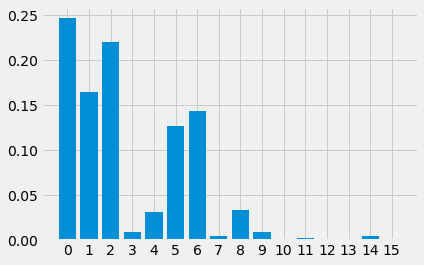

In [498]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [161]:
# Conditional Report: Lookinig at Playoff samples only and testing whether they will make the QF or not
NbaShuffledQF = NbaShuffledQF.drop(Nba[Nba.Playoff != 1].index)
NbaShuffledQF = NbaShuffledQF.drop(columns=['Team','PS', 'PA', 'Year', 'Playoff', 'SF', 'F', 'C', 'Season'])
NbaShuffledQF.head(60)

KeyError: '[15, 16, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60] not found in axis'

In [157]:
# Create x and y datasets with the target variable 'Playoff' in mind. 0 denotes a team does not make the playoffs. 1 denotes that a team does make the playoffs.
y = NbaShuffledQF.QF
x = NbaShuffledQF.drop('QF',axis=1)
# Saving feature names for later use
feature_list = list(x.columns)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [158]:
#Create a Gaussian Classifier
forest=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
forest.fit(x_train,y_train)

# prediction on test set
y_pred=forest.predict(x_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

ValueError: could not convert string to float: '21-22'

In [148]:
Compare = x_test.copy()
Compare['QF'] = y_test
Compare['Pred QF'] = y_pred
Compare = pd.merge(Teams, Compare, left_index=True, right_index=True)
Compare.head(30)

,Team,FG%,3P%,FT%,TRB,AST,STL,BLK,TOV,PF,QF,Pred QF
39,Boston Celtics,0.465,0.365,0.802,44.5,26.3,8.6,5.3,12.4,20.4,1.0,1.0
6,Milwaukee Bucks,0.468,0.366,0.776,46.7,23.9,7.6,4.0,13.4,18.2,1.0,0.0
10,Toronto Raptors,0.445,0.349,0.759,45.3,22.1,9.0,4.6,12.5,19.6,0.0,0.0
2,Golden State Warriors,0.469,0.364,0.769,45.5,27.1,8.8,4.5,14.9,21.0,1.0,0.0
1,Memphis Grizzlies,0.461,0.353,0.734,49.2,26.0,9.8,6.5,13.2,19.8,1.0,1.0
11,Minnesota Timberwolves,0.457,0.358,0.778,44.2,25.7,8.8,5.6,14.3,21.8,0.0,0.0
5,Boston Celtics,0.466,0.356,0.816,46.1,24.8,7.2,5.8,13.6,18.5,1.0,0.0
0,Phoenix Suns,0.485,0.364,0.797,45.3,27.4,8.6,4.4,12.9,19.9,1.0,1.0
4,Dallas Mavericks,0.461,0.350,0.771,43.0,23.4,6.7,4.0,12.5,19.7,1.0,0.0
35,Houston Rockets,0.449,0.356,0.791,42.1,21.2,8.5,4.9,12.7,22.0,1.0,0.0
